In [1]:
%load_ext autoreload
%autoreload 2

import os, pickle, random, sbmtm
# import seaborn as sns; sns.set(style="white", color_codes=True) # is not installed on system, just folder in this directory
import numpy as np
import pandas as pd
from sbmtm import sbmtm
import matplotlib.pyplot as plt
%matplotlib inline

from helper import nmi_score

# Load a set of reviews for a book

In [11]:
path_read = 'cleaned_posts/'
fname_read = 'TRAINING-10149142-the-family-fang.json'
filename = os.path.join(path_read,fname_read)
print(filename)

cleaned_posts/TRAINING-10149142-the-family-fang.json


In [24]:
with open(filename,"r",encoding="utf8") as f:
    df = pd.DataFrame(pd.read_json(f))

In [25]:
df

,doc,score,ups,delta,removed_words,name,raw_text,affect,posemo,negemo,anx,anger,sad,word_count
1,"[fun, read, book, actually, finish, book, disn...",5,0,-338,"[something, or, , so, it, put, up, will, the,...",ehicifj.json,i had so much fun reading this book i actuall...,9,7,2,0,0,1,54
10,"[definitely, question, sanity, give, 5, star, ...",5,0,276,"[ , so, one, someone, well, for, did, the, why...",ffcfabb.json,this is definitely one where i question my sa...,15,5,10,2,3,4,62
100,"[weird, story, hard, time, get, initially, wei...",4,0,-18,"[would, some, many, so, it, for, did, take, in...",aehibdf.json,such a weird story and i had a hard time getti...,7,3,4,0,0,0,50
1000,"[quirky, bizarre, thoroughly, think, provoke, ...",5,0,20,"[yet, was, with, out, two, i, the, made, to, a...",dgbjajh.json,such a quirky and bizarre yet thoroughly thoug...,1,0,1,0,0,0,25
1001,"[like, dysfunctional, family, story, devotion,...",3,0,-292,"[was, except, the, to, although, is, that, les...",bibdjih.json,i mostly liked this dysfunctional family story...,4,3,1,1,0,0,18
1002,"[think, 1, 2, star, 3, 5, find, fascinated, ke...",3,0,-204,"[would, much, myself, sometimes, just, the, re...",afajfjh.json,sometimes i think there should be 1 2 stars i ...,3,2,1,0,0,0,18
1003,"[family, fang, mother, father, child, parent, ...",3,0,-290,"[are, , so, most, it, less, how, two, the, bu...",ceejjda.json,the family fang is a mother and father and tw...,3,2,1,0,1,0,41
1004,"[happy, family, alike, unhappy, family, unhapp...",4,0,420,"[something, out, are, or, so, one, it, not, fo...",fefjbce.json,"""all happy families are alike each unhappy fam...",16,9,7,0,1,6,130
1005,"[highly, reminiscent, ann, patchett, novel, ba...",3,0,-309,"[from, the, an, same, has, is, to, me, not, fo...",aghdhe.json,highly reminiscent of an ann patchett novel wh...,3,0,3,1,0,1,21
1006,"[spoiler, amazing, young, fang, journey, happi...",5,0,550,"[something, are, some, so, throughout, most, i...",hedjfd.json,here be spoilers while it's amazing to see the...,28,13,14,5,3,1,232


In [28]:
m_min = 100 ## minimum text length
df = df[df['word_count']>=m_min]

list_texts = list(df['doc'])
list_titles = list(df.index)
list_dt = list(df['delta'])#

#list_m = [len(text) for text in list_texts]
#D = len(list_texts)

# Make the graph

In [29]:
## create the model and make the graph.
model = sbmtm()
model.make_graph(list_texts,documents = list_titles)
g = model.g## this is the graph

V = model.get_V()
D = model.get_D()
V,D

Reached 0th node


(3504, 226)

# Run the inference a few times

In [31]:
## run the inference
## what are the statistics to be extracted?

list_mdl = []
list_c_td = []
list_c_tw = []
list_Bwd = []
## mdl


n_rep = 10 ## number of different runs
B_min = 3 ## minimum number of blocks

## we always look at the lowest level in the hierarchy
for i in range(n_rep):

    model.fit(min_blocks = B_min)
    mdl = model.mdl
    
    L = model.L
    ## group memberhsip on uppermost level
    p_td_d, p_tw_w = model.group_membership(l=0)
    c_td = np.argmax(p_td_d,axis=0)
    c_tw = np.argmax(p_tw_w,axis=0)
    
    list_mdl += [mdl]
    list_c_td += [c_td]
    list_c_tw += [c_tw]
    
    B_d = len(set(c_td))
    B_w = len(set(c_tw))
#     B = B_d + B_w
    list_Bwd += [(B_d,B_w)]
    

NameError: name 'n_init' is not defined

# Evaluate different solutions

In [7]:
## sort according to mdl
indsort = np.argsort(list_mdl)
list_mdl = np.array(list_mdl)[indsort]
list_c_td = np.array(list_c_td)[indsort]
list_c_tw = np.array(list_c_tw)[indsort]
list_Bwd = np.array(list_Bwd)[indsort]

Text(0,0.5,'mdl')

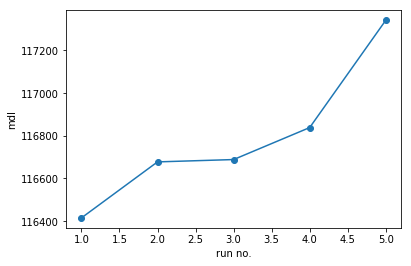

In [8]:
## value of the mdl across different runs
plt.plot(np.arange(n_rep)+1,list_mdl,marker='o')
plt.xlabel('run no.')
plt.ylabel('mdl')

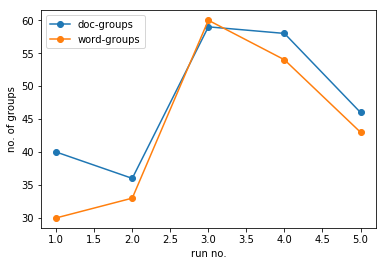

In [10]:
## number of groups
plt.plot(np.arange(n_rep)+1,[h[0] for h in list_Bwd],label='doc-groups',marker='o')
plt.plot(np.arange(n_rep)+1,[h[1] for h in list_Bwd],label='word-groups',marker='o')

plt.xlabel('run no.')
plt.ylabel('no. of groups')
plt.legend()

In [11]:
## calculate the nmi between group membership of nodes using nmi
## we do it separately for doc-nodes and word-nodes
arr_nmi_d = np.nan*np.zeros((n_rep,n_rep))
arr_nmi_w = np.nan*np.zeros((n_rep,n_rep))

for i in range(n_rep):
    c_td_i = list_c_td[i]
    c_tw_i = list_c_tw[i]
    for j in range(n_rep):
        c_td_j = list_c_td[j]
        c_tw_j = list_c_tw[j]
        if i<j:
            nmi = nmi_score(c_td_i,c_td_j)
            arr_nmi_d[i,j] = nmi
            nmi = nmi_score(c_tw_i,c_tw_j)
            arr_nmi_w[i,j] = nmi
                
                

Text(0.5,1,'NMI words')

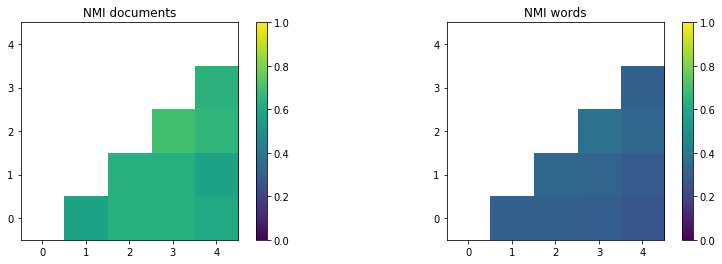

In [12]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.imshow(arr_nmi_d,origin='lower',vmin=0,vmax=1)
plt.colorbar()
plt.title('NMI documents')

plt.subplot(122)
plt.imshow(arr_nmi_w,origin='lower',vmin=0,vmax=1)
plt.colorbar()
plt.title('NMI words')


In [14]:
print(np.nanmin(arr_nmi_d), np.nanmax(arr_nmi_d))
print(np.nanmin(arr_nmi_w), np.nanmax(arr_nmi_w))

0.5738625235282868 0.6955260502768728
0.2676078822460744 0.3713721619033176


So we see that the number of groups over runs is much more stable when requiring a nontrivial solution. Note that the calculation then also takes much longer.

The NMI for the document-nodes is quite high.

The NMI for the word-nodes is not so high (<0.35). 